<a href="https://colab.research.google.com/github/HackerJacky/TimeSeriesColab/blob/main/ch2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

In [ ]:
%matplotlib inline

# 自我回歸模型
- 模擬不同beta下的`AR(1)`序列
- 利用匯率資料估計`AR(1)`模型參數
- 購買力困惑 (PPP puzzle)

## 模擬不同beta下的AR(1)序列
- $ \beta_1 = 0.2$
- $\beta_1 = 0.95$
- $\beta_0 = 0$
- 模型設定
$$
y_t = \beta_0 + \beta_1 y_{t-1} + \epsilon_t
$$
- 設定初始值 $y_0 = 0$
- 生成隨機數 $\epsilon_1\sim N(0,1)$
- 得到序列值 $y_1$
- 依此類推可得所有序列值

In [ ]:
len(y)

In [3]:
y = np.zeros(1001)

In [4]:
range(1,1000)

range(1, 1000)

In [5]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


In [ ]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'Series')

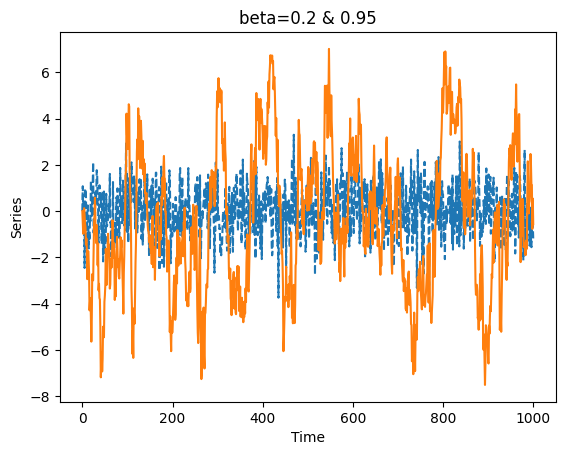

In [9]:
# set beta
b_0 = 0
b_11 = 0.2
b_12 = 0.95
sigma = 1
x = np.zeros(1001)
y = np.zeros(1001)
for i in range(1,1001):
    x[i] = b_0 + b_11*x[i-1] + np.random.randn()
    y[i] = b_0 + b_12*y[i-1] + np.random.randn()


plt.plot(x,'--')
plt.plot(y,'-')
plt.title('beta=0.2 & 0.95')
plt.xlabel('Time')
plt.ylabel('Series')


In [14]:
data = yf.download('EURUSD=X',start='2020-01-01',end='2025-03-20')
data.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1360 entries, 2020-01-01 to 2025-03-19
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, EURUSD=X)   1360 non-null   float64
 1   (High, EURUSD=X)    1360 non-null   float64
 2   (Low, EURUSD=X)     1360 non-null   float64
 3   (Open, EURUSD=X)    1360 non-null   float64
 4   (Volume, EURUSD=X)  1360 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.8 KB


In [15]:
data = data[['Close']]
data.columns = ['price_eurusd']
data.head()

,price_eurusd
Date,
2020-01-01,1.122083
2020-01-02,1.122083
2020-01-03,1.117144
2020-01-06,1.116196
2020-01-07,1.119799


<Axes: xlabel='Date'>

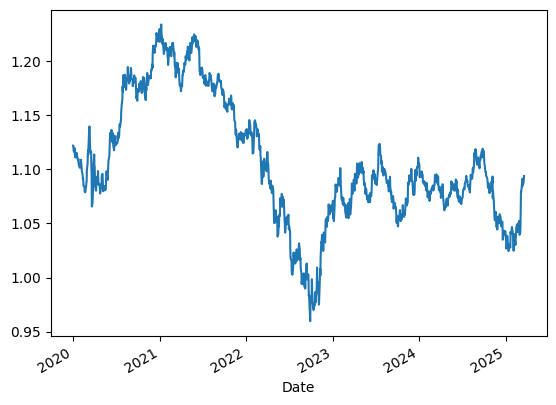

In [18]:
data.price_eurusd.plot()

In [21]:
# AR(1): eurusd
y = data.price_eurusd
x = sm.add_constant(data.price_eurusd.shift(1))
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           price_eurusd   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.765e+05
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:05:15   Log-Likelihood:                 5244.8
No. Observations:                1359   AIC:                        -1.049e+04
Df Residuals:                    1357   BIC:                        -1.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0042      0.003      1.607   

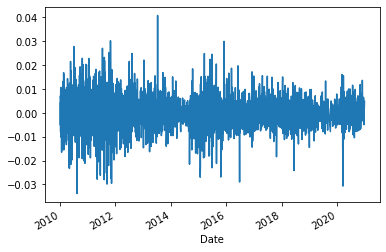

In [ ]:
res.resid.plot()
#res.fittedvalues.plot()

In [ ]:
# generate log return
data['ret'] = np.log(data.eurusdx).diff()
data.head()

In [ ]:
data.ret

In [ ]:
# AR(1): ret_eurusd
x = sm.add_constant(data.ret.shift(1))
y = data.ret
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

In [ ]:
# test PPP puzzle

test = pd.read_csv('re_us.csv',index_col='DATE')
test.info()

In [ ]:
# set date index
test.index = pd.to_datetime(test.index)

In [ ]:
x = sm.add_constant(test.RBUSBIS.shift())
y = test.RBUSBIS
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

In [ ]:
# calculate the half-life (month frequency)
np.log(0.5)/np.log(0.9888)

In [ ]:
# import package
from statsmodels.tsa.ar_model import ar_select_order
# data: y
# ic='aic'/'bic'
mod = ar_select_order(y, ic='aic', maxlag=10)
mod.ar_lags